In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/muaazshaikh/phishing-detection/data/phising.csv")

In [24]:
# convert -1 in 'Result' to 0 for binary classification
if set(df['Result'].unique()) == {-1, 1}:
    df['Result'] = df['Result'].map({-1: 0, 1: 1})
    print("Converted -1 to 0 in 'Result' column.")
else:
    print("No conversion needed for 'Result' column.")

No conversion needed for 'Result' column.


In [25]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [27]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11050     True
11051     True
11052     True
11053     True
11054    False
Length: 11055, dtype: bool

In [28]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [29]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

having_IP_Address: 2 unique values
URL_Length: 3 unique values
Shortining_Service: 2 unique values
having_At_Symbol: 2 unique values
double_slash_redirecting: 2 unique values
Prefix_Suffix: 2 unique values
having_Sub_Domain: 3 unique values
SSLfinal_State: 3 unique values
Domain_registeration_length: 2 unique values
Favicon: 2 unique values
port: 2 unique values
HTTPS_token: 2 unique values
Request_URL: 2 unique values
URL_of_Anchor: 3 unique values
Links_in_tags: 3 unique values
SFH: 3 unique values
Submitting_to_email: 2 unique values
Abnormal_URL: 2 unique values
Redirect: 2 unique values
on_mouseover: 2 unique values
RightClick: 2 unique values
popUpWidnow: 2 unique values
Iframe: 2 unique values
age_of_domain: 2 unique values
DNSRecord: 2 unique values
web_traffic: 3 unique values
Page_Rank: 2 unique values
Google_Index: 2 unique values
Links_pointing_to_page: 3 unique values
Statistical_report: 2 unique values
Result: 2 unique values


In [30]:
for col in df.columns:
    print(f"{col}: {df[col].value_counts(normalize=True)*100}")

having_IP_Address: having_IP_Address
 1    65.689733
-1    34.310267
Name: proportion, dtype: float64
URL_Length: URL_Length
-1    81.049299
 1    17.729534
 0     1.221167
Name: proportion, dtype: float64
Shortining_Service: Shortining_Service
 1    86.938037
-1    13.061963
Name: proportion, dtype: float64
having_At_Symbol: having_At_Symbol
 1    85.029398
-1    14.970602
Name: proportion, dtype: float64
double_slash_redirecting: double_slash_redirecting
 1    87.073722
-1    12.926278
Name: proportion, dtype: float64
Prefix_Suffix: Prefix_Suffix
-1    86.748078
 1    13.251922
Name: proportion, dtype: float64
having_Sub_Domain: having_Sub_Domain
 1    36.815920
 0    32.763455
-1    30.420624
Name: proportion, dtype: float64
SSLfinal_State: SSLfinal_State
 1    57.268204
-1    32.175486
 0    10.556309
Name: proportion, dtype: float64
Domain_registeration_length: Domain_registeration_length
-1    66.838535
 1    33.161465
Name: proportion, dtype: float64
Favicon: Favicon
 1    81.42

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


In [32]:
df.mean().sort_values(ascending=False)

RightClick                     0.913885
Iframe                         0.816915
on_mouseover                   0.762099
double_slash_redirecting       0.741474
Shortining_Service             0.738761
port                           0.728268
Google_Index                   0.721574
Statistical_report             0.719584
Abnormal_URL                   0.705292
having_At_Symbol               0.700588
HTTPS_token                    0.675079
Submitting_to_email            0.635640
Favicon                        0.628584
popUpWidnow                    0.613388
Result                         0.556943
DNSRecord                      0.377114
Links_pointing_to_page         0.344007
having_IP_Address              0.313795
web_traffic                    0.287291
SSLfinal_State                 0.250927
Request_URL                    0.186793
Redirect                       0.115694
having_Sub_Domain              0.063953
age_of_domain                  0.061239
URL_of_Anchor                 -0.076526


In [33]:
df['RightClick'].value_counts()

RightClick
 1    10579
-1      476
Name: count, dtype: int64

In [34]:
df.corr()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IP_Address,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.087025,...,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URL_Length,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,-0.042497,...,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.006101,...,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,0.304899,...,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.035100,...,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.007504,...,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,-0.016704,...,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,-0.014757,...,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.054253,...,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789
Favicon,0.087025,-0.042497,0.006101,0.304899,0.035100,-0.007504,-0.016704,-0.014757,0.054253,1.000000,...,0.939633,0.627607,-0.002628,0.088211,-0.050922,0.011699,-0.016668,-0.127243,0.300917,-0.000280


In [35]:
correlation = df.corr()

In [36]:
correlation['Result'].sort_values(ascending=False)

Result                         1.000000
SSLfinal_State                 0.714741
URL_of_Anchor                  0.692935
Prefix_Suffix                  0.348606
web_traffic                    0.346103
having_Sub_Domain              0.298323
Request_URL                    0.253372
Links_in_tags                  0.248229
SFH                            0.221419
Google_Index                   0.128950
age_of_domain                  0.121496
Page_Rank                      0.104645
having_IP_Address              0.094160
Statistical_report             0.079857
DNSRecord                      0.075718
URL_Length                     0.057430
having_At_Symbol               0.052948
on_mouseover                   0.041838
port                           0.036419
Links_pointing_to_page         0.032574
Submitting_to_email            0.018249
RightClick                     0.012653
popUpWidnow                    0.000086
Favicon                       -0.000280
Iframe                        -0.003394


In [45]:
legit = df[df["Result"] == 1]
phish = df[df["Result"] == 0]

for col in df.columns.drop("Result"):
    legit_mean = legit[col].mean()
    phish_mean = phish[col].mean()
    print(f"{col}| Legit Mean: {legit_mean:.2f} | Phish Mean: {phish_mean:.2f}")

having_IP_Address| Legit Mean: 0.39 | Phish Mean: 0.21
URL_Length| Legit Mean: -0.59 | Phish Mean: -0.68
Shortining_Service| Legit Mean: 0.70 | Phish Mean: 0.79
having_At_Symbol| Legit Mean: 0.73 | Phish Mean: 0.66
double_slash_redirecting| Legit Mean: 0.72 | Phish Mean: 0.77
Prefix_Suffix| Legit Mean: -0.52 | Phish Mean: -1.00
having_Sub_Domain| Legit Mean: 0.28 | Phish Mean: -0.21
SSLfinal_State| Legit Mean: 0.83 | Phish Mean: -0.48
Domain_registeration_length| Legit Mean: -0.53 | Phish Mean: -0.10
Favicon| Legit Mean: 0.63 | Phish Mean: 0.63
port| Legit Mean: 0.75 | Phish Mean: 0.70
HTTPS_token| Legit Mean: 0.65 | Phish Mean: 0.71
Request_URL| Legit Mean: 0.41 | Phish Mean: -0.09
URL_of_Anchor| Legit Mean: 0.37 | Phish Mean: -0.63
Links_in_tags| Legit Mean: 0.05 | Phish Mean: -0.33
SFH| Legit Mean: -0.45 | Phish Mean: -0.78
Submitting_to_email| Legit Mean: 0.65 | Phish Mean: 0.62
Abnormal_URL| Legit Mean: 0.67 | Phish Mean: 0.75
Redirect| Legit Mean: 0.11 | Phish Mean: 0.12
on_mouse

In [37]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
X = df.drop('Result', axis = 1)
y = df['Result']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [40]:
xgb = XGBClassifier(
    n_estimators = 300,
    max_depth= 6,
    learning_rate = 0.05,
    random_state = 42
)

In [41]:
xgb.fit(X_train_scaled, y_train)



,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [42]:
xgb.feature_importances_

array([0.01265019, 0.01041125, 0.01431213, 0.00436358, 0.01195224,
       0.07210805, 0.01511311, 0.43181917, 0.01233678, 0.01044274,
       0.00529828, 0.01305723, 0.00856879, 0.17122704, 0.02239715,
       0.03039588, 0.01054193, 0.00557825, 0.0091345 , 0.00528379,
       0.00795218, 0.00864945, 0.00724822, 0.00994012, 0.01813235,
       0.02495303, 0.0088388 , 0.01995953, 0.01219416, 0.00514011],
      dtype=float32)

In [44]:
importances = pd.Series(xgb.feature_importances_, index = X.columns)
importances.sort_values(ascending=False)

SSLfinal_State                 0.431819
URL_of_Anchor                  0.171227
Prefix_Suffix                  0.072108
SFH                            0.030396
web_traffic                    0.024953
Links_in_tags                  0.022397
Google_Index                   0.019960
DNSRecord                      0.018132
having_Sub_Domain              0.015113
Shortining_Service             0.014312
HTTPS_token                    0.013057
having_IP_Address              0.012650
Domain_registeration_length    0.012337
Links_pointing_to_page         0.012194
double_slash_redirecting       0.011952
Submitting_to_email            0.010542
Favicon                        0.010443
URL_Length                     0.010411
age_of_domain                  0.009940
Redirect                       0.009135
Page_Rank                      0.008839
popUpWidnow                    0.008649
Request_URL                    0.008569
RightClick                     0.007952
Iframe                         0.007248


In [47]:
from sklearn.feature_selection import mutual_info_classif
X = df.drop("Result", axis = 1)
y = df["Result"]
mi_scores = mutual_info_classif(X, y)
mi = pd.Series(mi_scores, index = X.columns).sort_values(ascending=False)
mi.head(10)

SSLfinal_State                 0.347411
URL_of_Anchor                  0.335357
Prefix_Suffix                  0.089880
web_traffic                    0.082280
having_Sub_Domain              0.078196
Links_in_tags                  0.033844
Request_URL                    0.031796
Domain_registeration_length    0.030073
SFH                            0.024237
Google_Index                   0.012900
dtype: float64

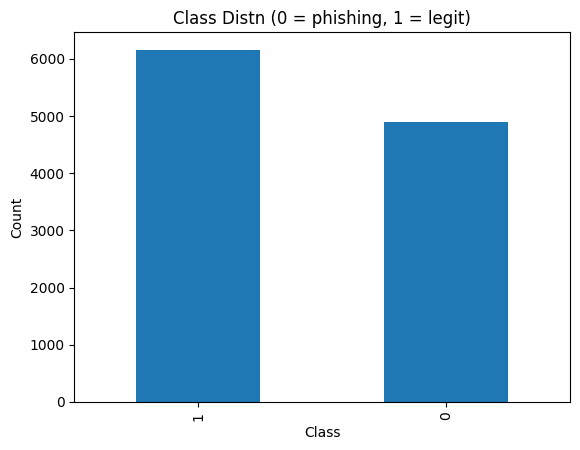

In [49]:
plt.figure()
df["Result"].value_counts().plot(kind="bar")
plt.title("Class Distn (0 = phishing, 1 = legit)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

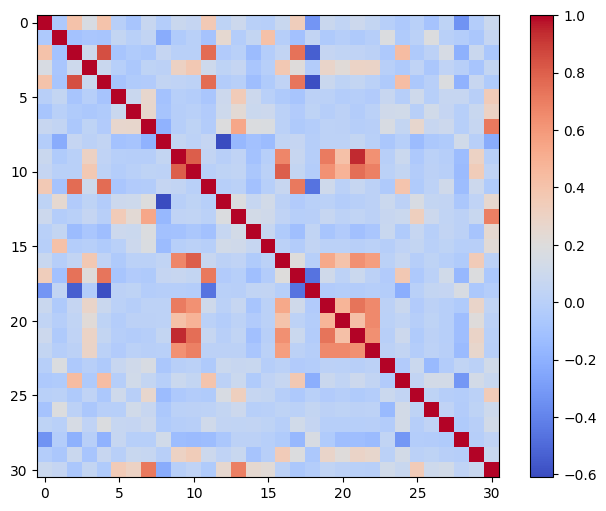

In [52]:
plt.figure(figsize=(8,6))
correlation = df.corr()
plt.imshow(correlation, cmap = "coolwarm", interpolation = 'none')
plt.colorbar()
plt.show()

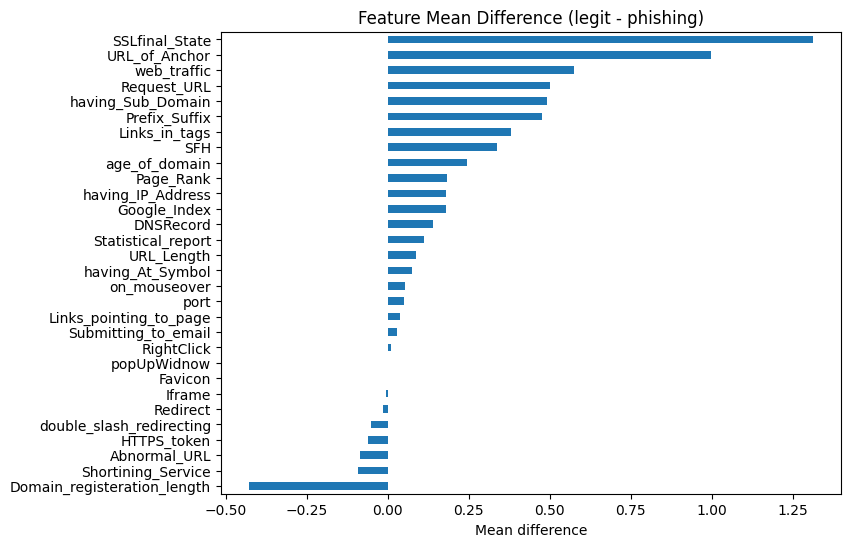

In [57]:
legit = df[df["Result"] == 1]
phish = df[df["Result"] == 0]
mean_legit = legit.mean()
mean_phish = phish.mean()

diff = (mean_legit - mean_phish).drop("Result")
plt.figure(figsize = (8,6))
diff.sort_values().plot(kind = "barh")
plt.title("Feature Mean Difference (legit - phishing)")
plt.xlabel("Mean difference")
plt.show()

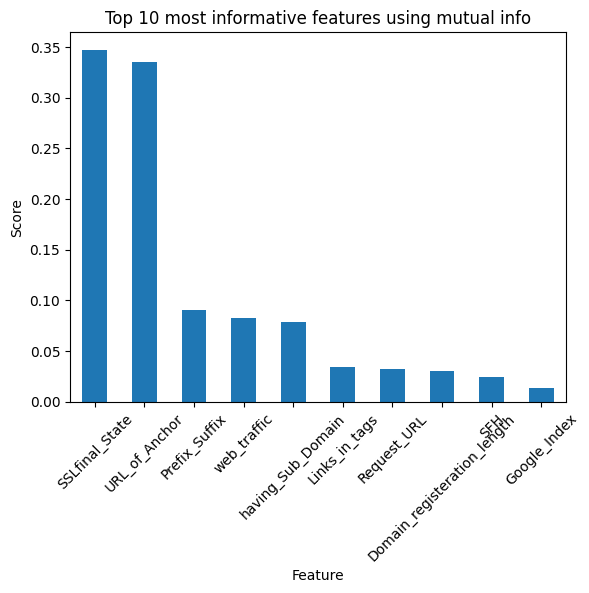

In [60]:
plt.figure()
mi.head(10).plot(kind="bar")
plt.title("Top 10 most informative features using mutual info")
plt.xlabel("Feature")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()